In [1]:
import pandas as pd

# Load Stock Data
stock_data = pd.read_excel('/content/Predicted returns excel example.xlsx',  parse_dates=True)

# # Display the loaded data for verification
print("\nStock Data:")
print(stock_data.head())



Stock Data:
  Unnamed: 0       XOM  Mkt-RF   SMB   HML    RF
0 2009-03-31  0.294566    8.95  0.03  3.47  0.02
1 2009-04-30 -2.099866   10.18  5.39  5.36  0.01
2 2009-05-31  4.640564    5.21 -2.52  0.28  0.00
3 2009-06-30  0.807505    0.43  2.63 -2.73  0.01
4 2009-07-31  0.686606    7.72  1.87  4.83  0.01


In [ ]:
import statsmodels.api as sm

# Rename 'Unnamed: 0' to 'Date' and set it as the index
stock_data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])  # Ensure 'Date' is in datetime format
stock_data.set_index('Date', inplace=True)

# Calculate Excess Returns (r_s - r_f) for the stock 'XOM'
stock_data['XOM_excess'] = stock_data['XOM'] - stock_data['RF']

# Prepare the explanatory variables (X): (r_m - r_f), SMB, HML
X = stock_data[['Mkt-RF', 'SMB', 'HML']]
X = sm.add_constant(X)  # Add constant term for alpha (Jensen's Alpha)

# Prepare the dependent variable (Y): Excess return for 'XOM'
Y = stock_data[['XOM_excess']]

# Display the first few rows of prepared data
print("\nPrepared Data:")
print(stock_data.head())



Prepared Data:
                 XOM  Mkt-RF   SMB   HML    RF  XOM_excess
Date                                                      
2009-03-31  0.294566    8.95  0.03  3.47  0.02    0.274566
2009-04-30 -2.099866   10.18  5.39  5.36  0.01   -2.109866
2009-05-31  4.640564    5.21 -2.52  0.28  0.00    4.640564
2009-06-30  0.807505    0.43  2.63 -2.73  0.01    0.797505
2009-07-31  0.686606    7.72  1.87  4.83  0.01    0.676606


In [ ]:
# Run the OLS regression
model = sm.OLS(Y, X).fit()

# Display the regression summary
print("\nFama-French Regression Results:")
print(model.summary())



Fama-French Regression Results:
                            OLS Regression Results                            
Dep. Variable:             XOM_excess   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     23.22
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           8.02e-12
Time:                        09:39:40   Log-Likelihood:                -323.04
No. Observations:                 119   AIC:                             654.1
Df Residuals:                     115   BIC:                             665.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.57

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/Predicted returns excel example.xlsx'
data = pd.read_excel(file_path, parse_dates=True)

# Preprocess data
data['Date'] = pd.to_datetime(data['Unnamed: 0'])
data.set_index('Date', inplace=True)
data.drop(columns=['Unnamed: 0'], inplace=True)

# Add excess returns for all stocks
risk_free_rate = data['RF']
for stock in ['XOM']:  # Add more stock columns here if necessary
    data[f'{stock}_excess'] = data[stock] - risk_free_rate

# Define the independent variables (risk factors)
factors = ['Mkt-RF', 'SMB', 'HML']

# Perform Fama-French regression for each stock
results_models = {}  # Store model objects instead of summaries
for stock in ['XOM']:  # Replace or extend this list with more stock names
    y = data[f'{stock}_excess']
    X = data[factors]
    X = sm.add_constant(X)  # Add constant term (alpha)
    model = sm.OLS(y, X).fit()
    results_models[stock] = model

    # Display results for each stock
    print(f"\nFama-French Regression Results for {stock}:")
    print(model.summary())



Fama-French Regression Results for XOM:
                            OLS Regression Results                            
Dep. Variable:             XOM_excess   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     23.22
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           8.02e-12
Time:                        09:39:40   Log-Likelihood:                -323.04
No. Observations:                 119   AIC:                             654.1
Df Residuals:                     115   BIC:                             665.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

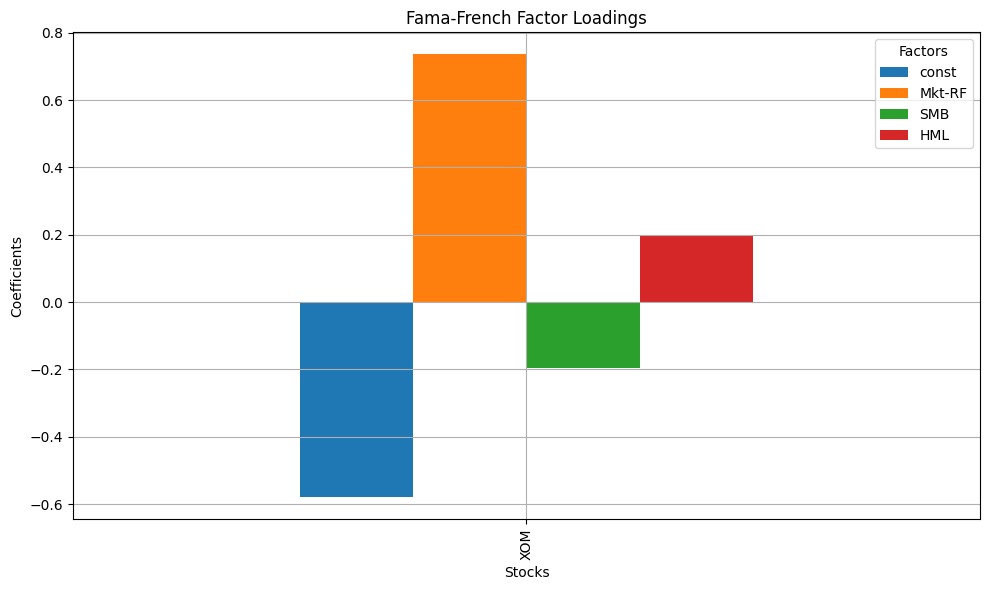

In [ ]:
# Visualization: Coefficients comparison (Optional for multiple stocks)
coefficients = pd.DataFrame(
    {stock: results_models[stock].params for stock in results_models.keys()}
).T

coefficients.plot(kind='bar', figsize=(10, 6))
plt.title("Fama-French Factor Loadings")
plt.xlabel("Stocks")
plt.ylabel("Coefficients")
plt.legend(title="Factors")
plt.grid()
plt.tight_layout()
plt.show()


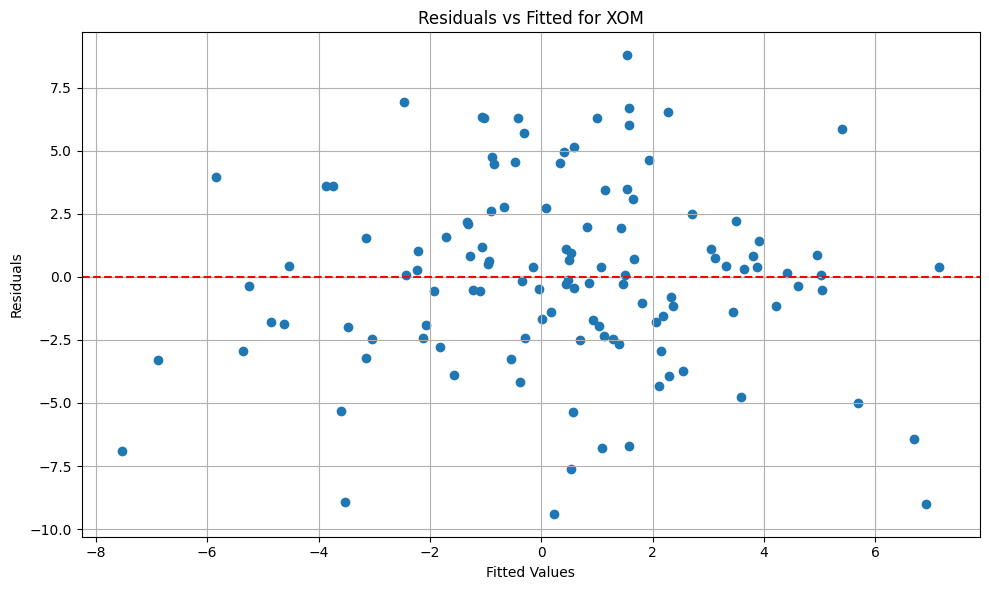

In [ ]:
# Step 2: Residuals Plot for Diagnostics

for stock in ['XOM']:  # Loop through the stock(s)
    model = results_models[stock]

    # Plot residuals vs fitted values (helps identify issues like non-linearity)
    plt.figure(figsize=(10, 6))
    plt.scatter(model.fittedvalues, model.resid)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals vs Fitted for {stock}')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.grid()
    plt.tight_layout()
    plt.show()


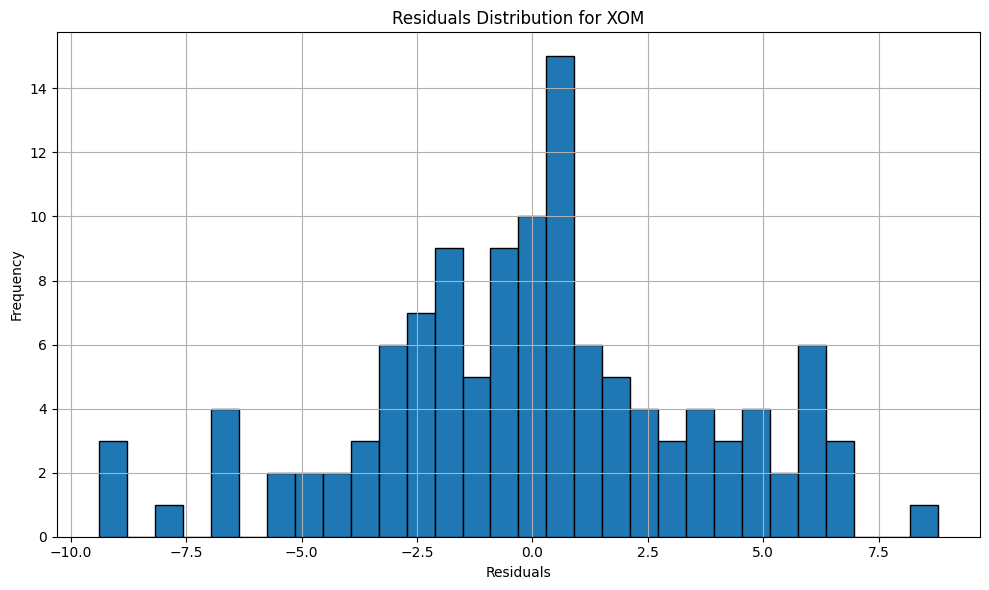

In [ ]:
    # Plot histogram of residuals (for normality check)
    plt.figure(figsize=(10, 6))
    plt.hist(model.resid, bins=30, edgecolor='black')
    plt.title(f'Residuals Distribution for {stock}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.grid()
    plt.tight_layout()
    plt.show()


In [ ]:
# Step 3: Summary report of the regression coefficients

coeff_summary = pd.DataFrame(
    {stock: results_models[stock].params for stock in results_models.keys()}
).T

# Print summary of coefficients for each stock
print("\nRegression Coefficients Summary:")
print(coeff_summary)

# If you want to include statistical significance of each factor:
p_values_summary = pd.DataFrame(
    {stock: results_models[stock].pvalues for stock in results_models.keys()}
).T

print("\nP-Values for Each Factor:")
print(p_values_summary)



Regression Coefficients Summary:
        const    Mkt-RF       SMB       HML
XOM -0.579098  0.735445 -0.197101  0.197552

P-Values for Each Factor:
        const        Mkt-RF       SMB     HML
XOM  0.113284  9.659162e-12  0.201761  0.1872


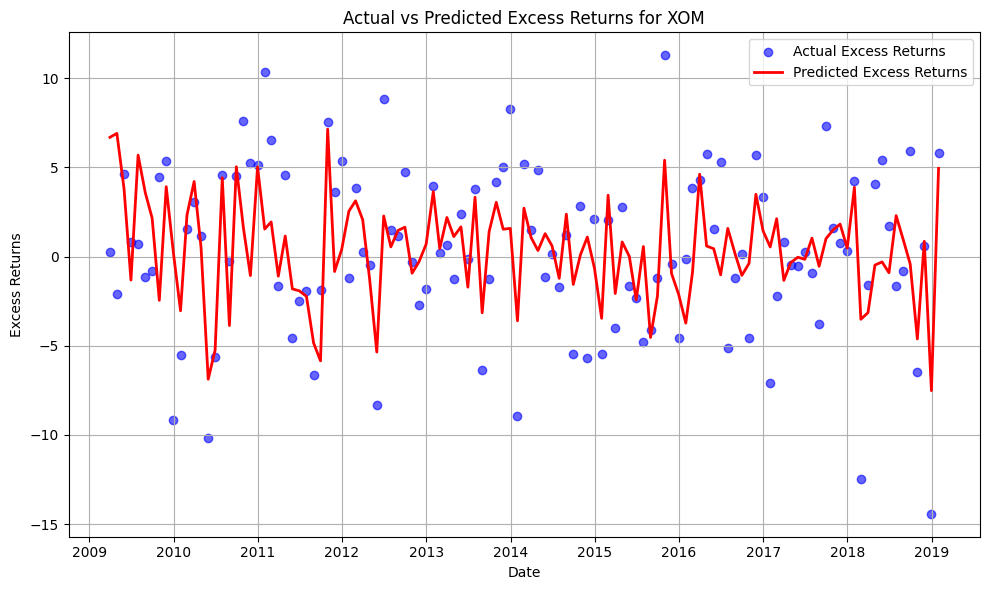

In [ ]:
# Step 4: Visualize the Actual vs Predicted Excess Returns
for stock in ['XOM']:  # Loop through the stock(s)
    model = results_models[stock]

    # Predicted excess returns
    predicted_returns = model.fittedvalues

    # Plot actual vs predicted excess returns
    plt.figure(figsize=(10, 6))
    plt.scatter(stock_data.index, stock_data['XOM_excess'], label='Actual Excess Returns', color='blue', alpha=0.6)
    plt.plot(stock_data.index, predicted_returns, label='Predicted Excess Returns', color='red', linewidth=2)
    plt.title(f'Actual vs Predicted Excess Returns for {stock}')
    plt.xlabel('Date')
    plt.ylabel('Excess Returns')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


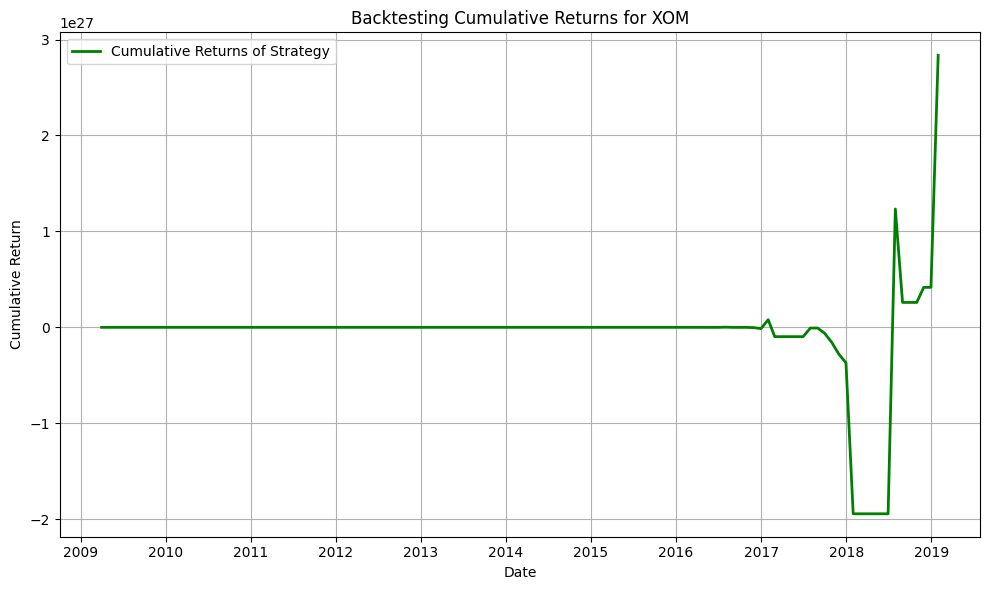

In [ ]:
import statsmodels.api as sm

# Step 5: Backtesting the Model (Optional)
# Assuming stock data has a 'Date' column in datetime format

# Add constant to the data for prediction (including intercept)
X = sm.add_constant(stock_data[['Mkt-RF', 'SMB', 'HML']])

# Predict excess returns using the model
stock_data['predicted_excess'] = results_models['XOM'].predict(X)

# Let's assume you're evaluating a simple strategy:
# Buy if the predicted excess return is positive, sell if negative.
stock_data['strategy_signal'] = stock_data['predicted_excess'].apply(lambda x: 1 if x > 0 else 0)

# Simulate portfolio returns (this is a simple backtest)
stock_data['portfolio_return'] = stock_data['strategy_signal'] * stock_data['XOM_excess']

# Cumulative returns of the strategy
stock_data['cumulative_returns'] = (1 + stock_data['portfolio_return']).cumprod()

# Plot the cumulative returns of the strategy
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['cumulative_returns'], label='Cumulative Returns of Strategy', color='green', linewidth=2)
plt.title(f'Backtesting Cumulative Returns for {stock}')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Calculate Sharpe Ratio for the strategy
sharpe_ratio = stock_data['portfolio_return'].mean() / stock_data['portfolio_return'].std() * np.sqrt(252)  # Assuming daily returns

# Calculate total return
total_return = stock_data['cumulative_returns'].iloc[-1] - 1

print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Total Return: {total_return:.2f}")


Sharpe Ratio: 6.02
Total Return: 2836194287209782047099846656.00


In [ ]:
import numpy as np

# Step 6: Performance Metrics Calculation

# 1. Calculate Volatility (Standard Deviation of returns)
volatility = stock_data['portfolio_return'].std() * np.sqrt(252)  # Annualized volatility (252 trading days)

# 2. Calculate Annualized Return
annualized_return = (stock_data['cumulative_returns'].iloc[-1])**(1/len(stock_data)) - 1  # Geometric mean

# 3. Calculate Maximum Drawdown
cumulative_returns = stock_data['cumulative_returns']
drawdown = (cumulative_returns / cumulative_returns.cummax()) - 1
max_drawdown = drawdown.min()

# 4. Calculate Sharpe Ratio (already calculated, but let's confirm)
sharpe_ratio = annualized_return / volatility

# Print out the performance metrics
print(f"Volatility (Annualized): {volatility:.4f}")
print(f"Annualized Return: {annualized_return:.4f}")
print(f"Maximum Drawdown: {max_drawdown:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")


Volatility (Annualized): 50.4213
Annualized Return: 0.7010
Maximum Drawdown: -7611442039.5115
Sharpe Ratio: 0.0139


Date
2009-03-31    0.274566
2009-04-30   -2.109866
2009-05-31    4.640564
2009-06-30    0.000000
2009-07-31    0.676606
Name: portfolio_return, dtype: float64
Factor Exposure (Coefficients):
Mkt-RF: 0.7354
SMB: -0.1971
HML: 0.1976
Intercept: -0.5791
Rolling Sharpe Ratio (first few values):
Date
2011-08-31    2.363785
2011-09-30    2.347473
2011-10-31    2.765008
2011-11-30    2.551929
2011-12-31    2.785068
Name: portfolio_return, dtype: float64


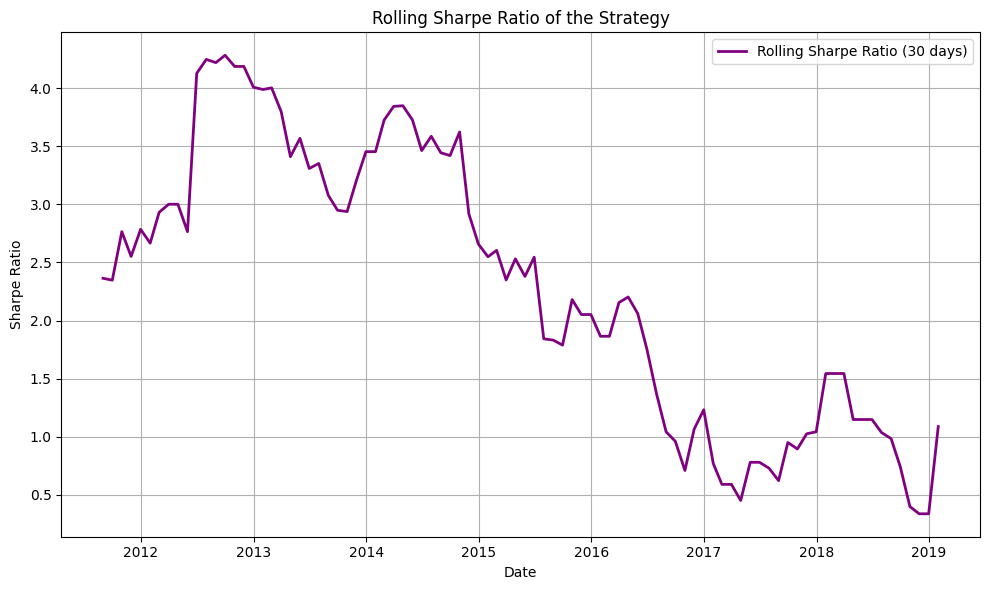

In [ ]:
# Check if the 'portfolio_return' column contains data
print(stock_data['portfolio_return'].head())

# 1. Factor Exposure: Coefficients of the regression model
factor_exposure = {
    'Mkt-RF': results_models['XOM'].params['Mkt-RF'],
    'SMB': results_models['XOM'].params['SMB'],
    'HML': results_models['XOM'].params['HML'],
    'Intercept': results_models['XOM'].params['const']
}

# Print the factor exposure
print("Factor Exposure (Coefficients):")
for factor, exposure in factor_exposure.items():
    print(f"{factor}: {exposure:.4f}")

# 2. Rolling Sharpe Ratio: Calculate rolling Sharpe ratio over a smaller window (e.g., 30 days)
window = 30  # Reduced window size for testing

# Calculate rolling mean and standard deviation
rolling_mean = stock_data['portfolio_return'].rolling(window).mean()
rolling_std = stock_data['portfolio_return'].rolling(window).std()

# Avoid division by zero (if std is zero)
rolling_sharpe = rolling_mean / rolling_std * np.sqrt(window)

# Drop NaN values (first 'window-1' rows may be NaN)
rolling_sharpe = rolling_sharpe.dropna()

# Check intermediate values
print("Rolling Sharpe Ratio (first few values):")
print(rolling_sharpe.head())

# Plot the Rolling Sharpe Ratio
plt.figure(figsize=(10, 6))
plt.plot(rolling_sharpe.index, rolling_sharpe, label='Rolling Sharpe Ratio (30 days)', color='purple', linewidth=2)
plt.title('Rolling Sharpe Ratio of the Strategy')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


<ipython-input-14-a868cb3b394d>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Cumulative Return: {stock_data['cumulative_returns'][-1]:.4f}")


Cumulative Return: 2836194287209782047099846656.0000
Maximum Drawdown: -7611442039.5115
Annualized Return: 364390623596719873167333035686688459991312620503611433709863184045590228025178249494528.0000


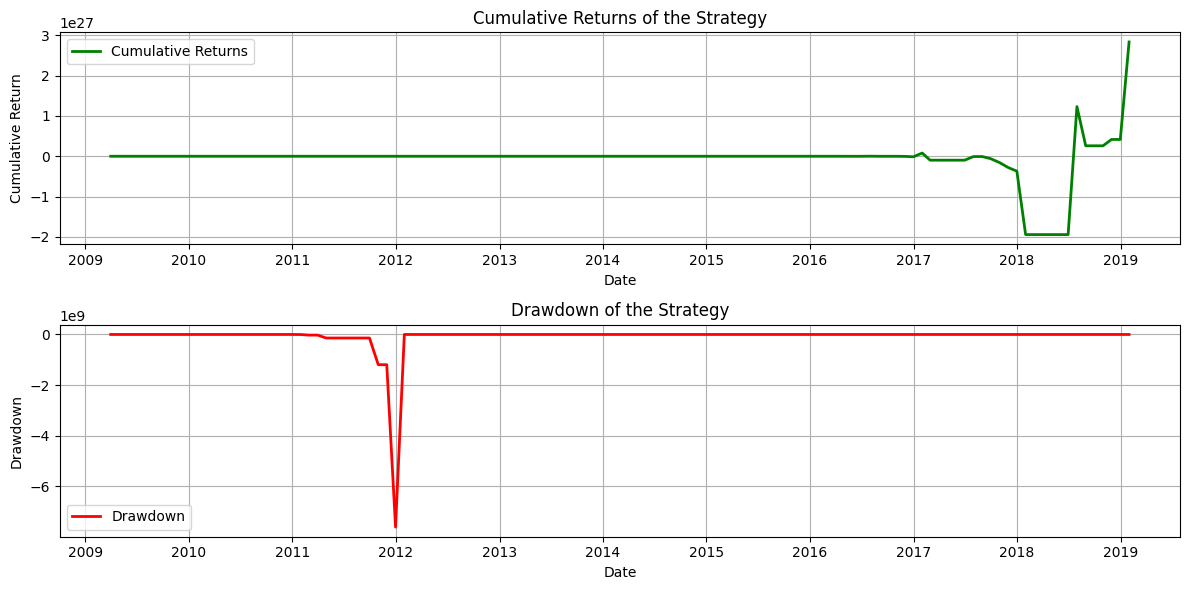

In [ ]:
# 1. Cumulative Returns
stock_data['cumulative_returns'] = (1 + stock_data['portfolio_return']).cumprod()

# 2. Maximum Drawdown
# Calculate the rolling maximum of the cumulative returns
stock_data['rolling_max'] = stock_data['cumulative_returns'].rolling(window=len(stock_data), min_periods=1).max()

# Calculate the drawdown
stock_data['drawdown'] = stock_data['cumulative_returns'] / stock_data['rolling_max'] - 1

# Maximum drawdown is the minimum drawdown value
max_drawdown = stock_data['drawdown'].min()

# 3. Annualized Return (Assuming daily returns)
annualized_return = (1 + stock_data['portfolio_return'].mean())**252 - 1  # 252 trading days in a year

# Print out the results
print(f"Cumulative Return: {stock_data['cumulative_returns'][-1]:.4f}")
print(f"Maximum Drawdown: {max_drawdown:.4f}")
print(f"Annualized Return: {annualized_return:.4f}")

# 4. Plot Cumulative Returns and Drawdown
plt.figure(figsize=(12, 6))

# Cumulative Returns
plt.subplot(2, 1, 1)
plt.plot(stock_data.index, stock_data['cumulative_returns'], label='Cumulative Returns', color='green', linewidth=2)
plt.title('Cumulative Returns of the Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()

# Drawdown
plt.subplot(2, 1, 2)
plt.plot(stock_data.index, stock_data['drawdown'], label='Drawdown', color='red', linewidth=2)
plt.title('Drawdown of the Strategy')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-15-eed27cb43ccb>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Log Cumulative Return: {stock_data['log_cumulative_returns'][-1]:.4f}")


Log Cumulative Return: -1082816589563214592.0000
Log Maximum Drawdown: -1693333725966949.0000
Log Annualized Return: 388193340532047615034341458594304435769539530986618880.0000


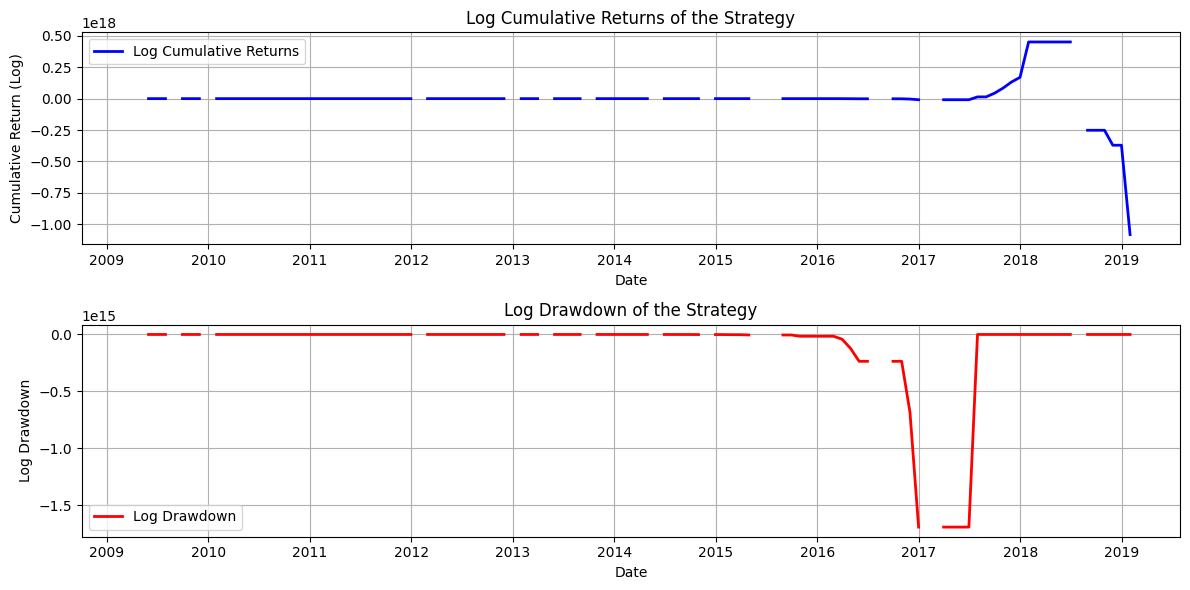

In [ ]:
import numpy as np

# Adjust returns with log transformation to mitigate extreme values
stock_data['log_portfolio_return'] = np.log1p(stock_data['portfolio_return'])

# Recalculate Cumulative Log Return (using log portfolio returns)
stock_data['log_cumulative_returns'] = (1 + stock_data['log_portfolio_return']).cumprod()

# Recalculate Maximum Drawdown and Annualized Return for the log returns
stock_data['log_rolling_max'] = stock_data['log_cumulative_returns'].rolling(window=len(stock_data), min_periods=1).max()
stock_data['log_drawdown'] = stock_data['log_cumulative_returns'] / stock_data['log_rolling_max'] - 1

log_max_drawdown = stock_data['log_drawdown'].min()
log_annualized_return = (1 + stock_data['log_portfolio_return'].mean())**252 - 1  # Assuming 252 trading days

# Print out the new results for log returns
print(f"Log Cumulative Return: {stock_data['log_cumulative_returns'][-1]:.4f}")
print(f"Log Maximum Drawdown: {log_max_drawdown:.4f}")
print(f"Log Annualized Return: {log_annualized_return:.4f}")

# Plot the log returns' Cumulative Return and Drawdown
plt.figure(figsize=(12, 6))

# Log Cumulative Returns
plt.subplot(2, 1, 1)
plt.plot(stock_data.index, stock_data['log_cumulative_returns'], label='Log Cumulative Returns', color='blue', linewidth=2)
plt.title('Log Cumulative Returns of the Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (Log)')
plt.legend()
plt.grid()

# Log Drawdown
plt.subplot(2, 1, 2)
plt.plot(stock_data.index, stock_data['log_drawdown'], label='Log Drawdown', color='red', linewidth=2)
plt.title('Log Drawdown of the Strategy')
plt.xlabel('Date')
plt.ylabel('Log Drawdown')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


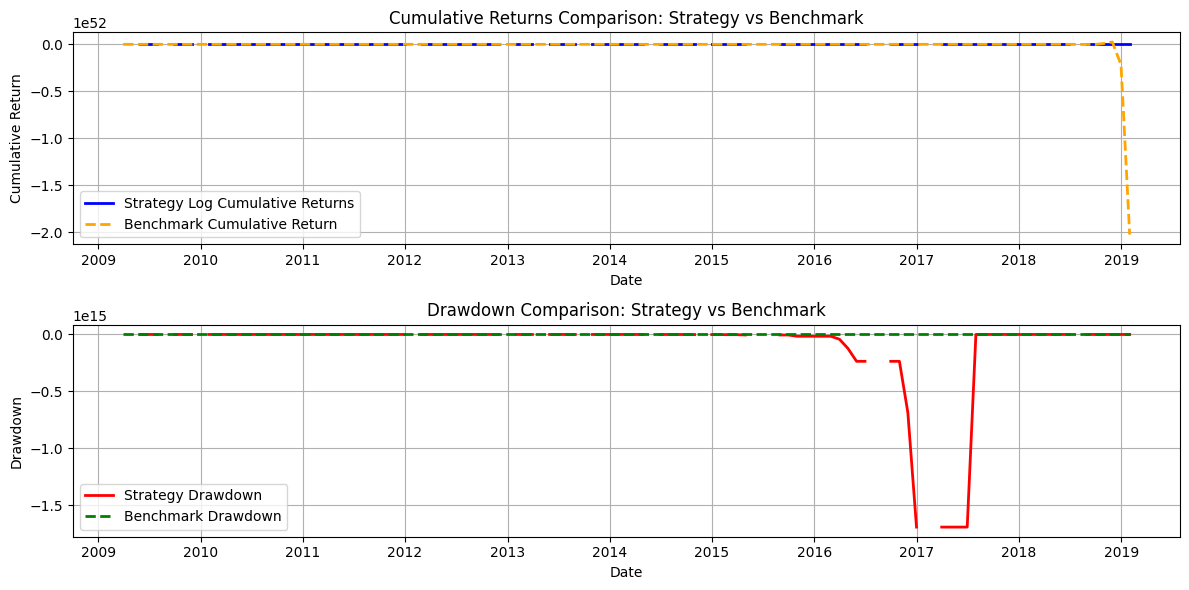

In [ ]:
# Cumulative returns of Market Benchmark (Mkt-RF)
stock_data['benchmark_cumulative_return'] = (1 + stock_data['Mkt-RF']).cumprod()

# Plot the comparison of cumulative returns
plt.figure(figsize=(12, 6))

# Strategy vs Benchmark Cumulative Returns
plt.subplot(2, 1, 1)
plt.plot(stock_data.index, stock_data['log_cumulative_returns'], label='Strategy Log Cumulative Returns', color='blue', linewidth=2)
plt.plot(stock_data.index, stock_data['benchmark_cumulative_return'], label='Benchmark Cumulative Return', color='orange', linestyle='--', linewidth=2)
plt.title('Cumulative Returns Comparison: Strategy vs Benchmark')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()

# Strategy vs Benchmark Drawdown
plt.subplot(2, 1, 2)
plt.plot(stock_data.index, stock_data['log_drawdown'], label='Strategy Drawdown', color='red', linewidth=2)
plt.plot(stock_data.index, (stock_data['benchmark_cumulative_return'] / stock_data['benchmark_cumulative_return'].rolling(window=len(stock_data), min_periods=1).max() - 1), label='Benchmark Drawdown', color='green', linestyle='--', linewidth=2)
plt.title('Drawdown Comparison: Strategy vs Benchmark')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Assuming stock_data is already prepared as described
# Calculate Tracking Error
stock_data['tracking_error'] = stock_data['XOM_excess'] - stock_data['predicted_excess']

# Prepare DataFrame for Excel export
excel_data = stock_data[['XOM_excess', 'predicted_excess', 'tracking_error']].copy()
excel_data.columns = ['Stock Returns', 'Predicted Returns', 'Tracking Error']

# Reset index to include the 'Date' column
excel_data = excel_data.reset_index()

# Save to Excel
excel_file_path = "XOM_returns_analysis.xlsx"
excel_data.to_excel(excel_file_path, index=False)

print(f"Excel file created: {excel_file_path}")


Excel file created: XOM_returns_analysis.xlsx


------------------------------------------------------------

In [2]:
import statsmodels.api as sm
import pandas as pd

# Load stock data
stock_data = pd.read_excel('/content/Predicted returns excel example.xlsx', parse_dates=True)

# Rename 'Unnamed: 0' to 'Date' and set as index
stock_data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

# Function to process each stock
def process_stock(stock_name):
    # Calculate Excess Returns (r_s - r_f)
    stock_data[f'{stock_name}_excess'] = stock_data[stock_name] - stock_data['RF']

    # Prepare explanatory variables
    X = stock_data[['Mkt-RF', 'SMB', 'HML']]
    X = sm.add_constant(X)  # Add constant for alpha

    # Dependent variable
    Y = stock_data[f'{stock_name}_excess']

    # Fit regression model
    model = sm.OLS(Y, X).fit()

    # Predicted returns
    stock_data[f'predicted_excess_{stock_name}'] = model.predict(X)

    # Tracking Error
    stock_data[f'tracking_error_{stock_name}'] = (
        stock_data[f'{stock_name}_excess'] - stock_data[f'predicted_excess_{stock_name}']
    )

    # Prepare data for Excel export
    excel_data = stock_data[
        [f'{stock_name}_excess', f'predicted_excess_{stock_name}', f'tracking_error_{stock_name}']
    ].copy()
    excel_data.columns = ['Stock Returns', 'Predicted Returns', 'Tracking Error']

    # Reset index
    excel_data = excel_data.reset_index()

    # Save to Excel
    excel_file_path = f"{stock_name}_returns_analysis.xlsx"
    excel_data.to_excel(excel_file_path, index=False)
    print(f"Excel file created for {stock_name}: {excel_file_path}")

    return model

# Process each stock (XOM, Mkt-RF, SMB, HML)
models = {}
for stock in ['XOM', 'Mkt-RF', 'SMB', 'HML']:
    print(f"\nProcessing {stock}...")
    models[stock] = process_stock(stock)



Processing XOM...
Excel file created for XOM: XOM_returns_analysis.xlsx

Processing Mkt-RF...
Excel file created for Mkt-RF: Mkt-RF_returns_analysis.xlsx

Processing SMB...
Excel file created for SMB: SMB_returns_analysis.xlsx

Processing HML...
Excel file created for HML: HML_returns_analysis.xlsx


In [6]:
# Display regression summary for XOM
print(models['XOM'].summary())


                            OLS Regression Results                            
Dep. Variable:             XOM_excess   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     23.22
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           8.02e-12
Time:                        18:07:19   Log-Likelihood:                -323.04
No. Observations:                 119   AIC:                             654.1
Df Residuals:                     115   BIC:                             665.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5791      0.363     -1.596      0.1

In [7]:
# Display regression summary for Mkt-RF
print(models['Mkt-RF'].summary())

                            OLS Regression Results                            
Dep. Variable:          Mkt-RF_excess   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.339e+05
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          1.85e-217
Time:                        18:07:57   Log-Likelihood:                 188.68
No. Observations:                 119   AIC:                            -369.4
Df Residuals:                     115   BIC:                            -358.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0288      0.005     -5.856      0.0

In [8]:
# Display regression summary for SMB
print(models['SMB'].summary())

                            OLS Regression Results                            
Dep. Variable:             SMB_excess   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.006e+04
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          1.25e-193
Time:                        18:08:11   Log-Likelihood:                 188.68
No. Observations:                 119   AIC:                            -369.4
Df Residuals:                     115   BIC:                            -358.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0288      0.005     -5.856      0.0

In [9]:
# Display regression summary for HML
print(models['HML'].summary())

                            OLS Regression Results                            
Dep. Variable:             HML_excess   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.736e+04
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          7.13e-193
Time:                        18:08:17   Log-Likelihood:                 188.68
No. Observations:                 119   AIC:                            -369.4
Df Residuals:                     115   BIC:                            -358.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0288      0.005     -5.856      0.0

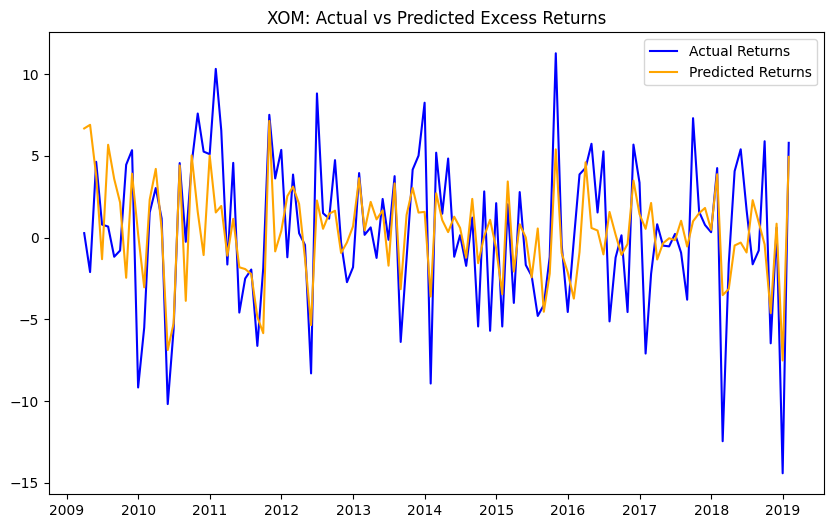

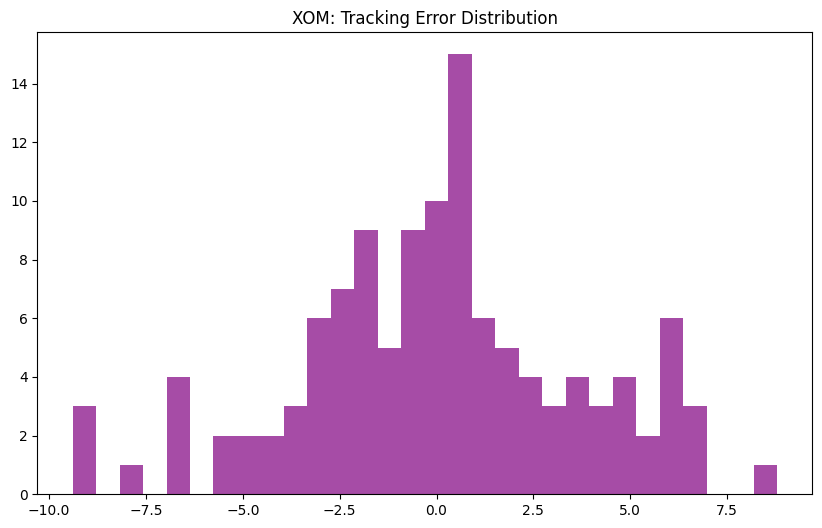

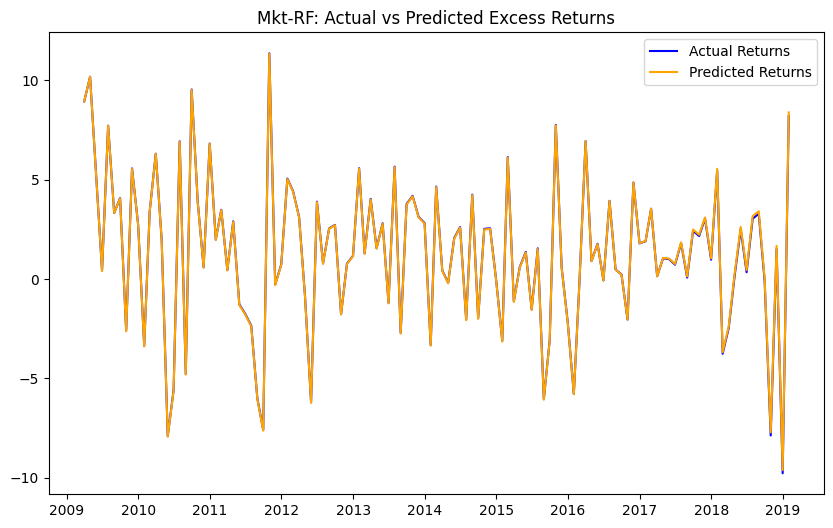

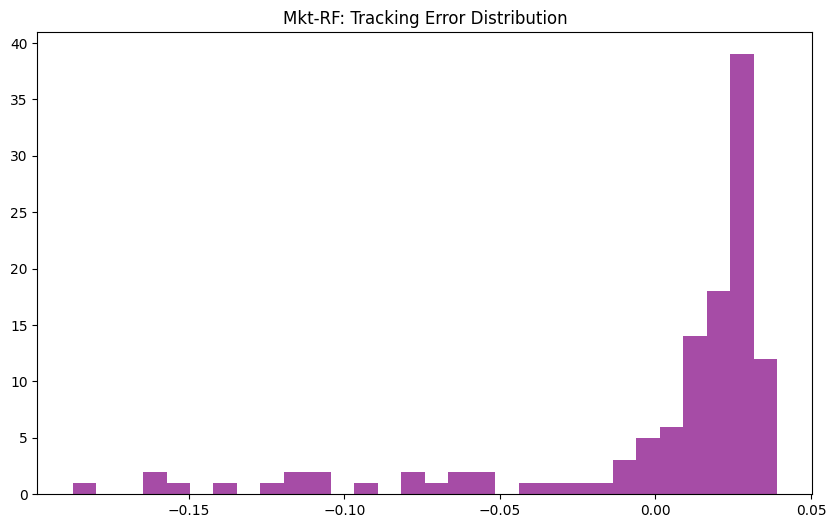

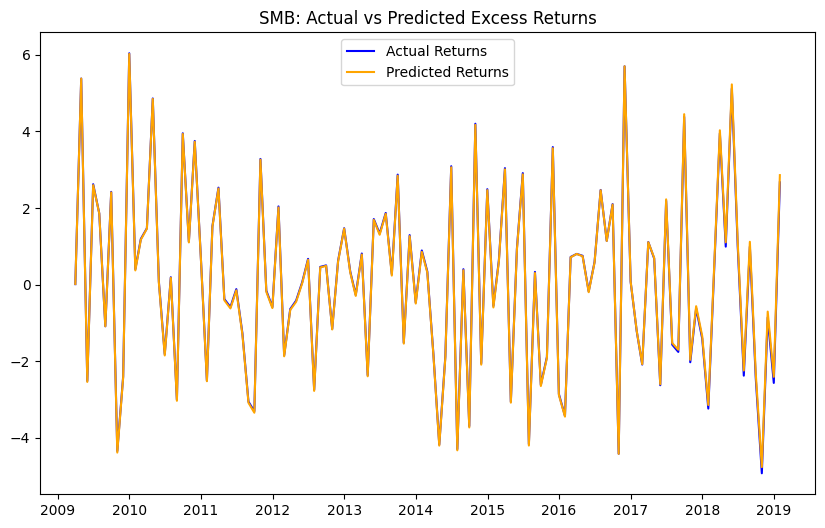

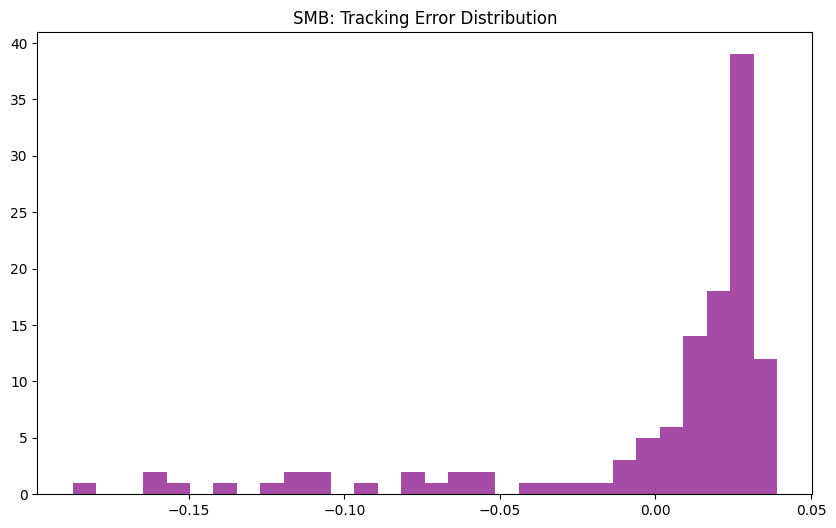

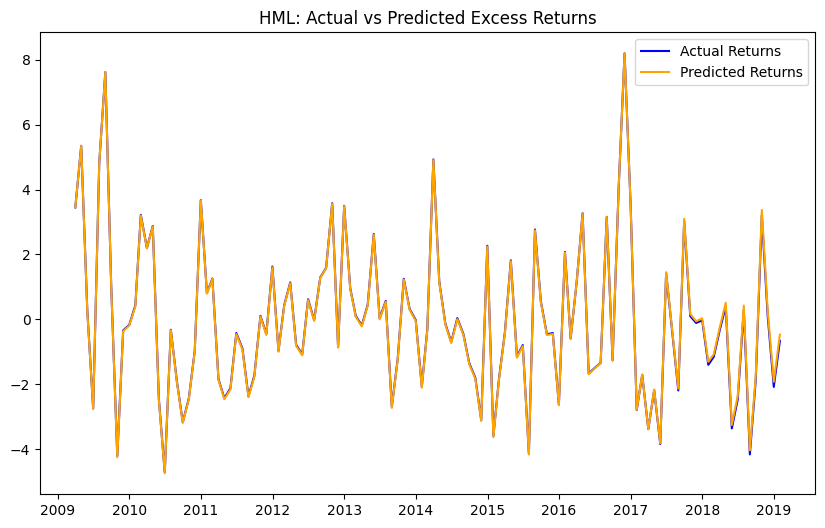

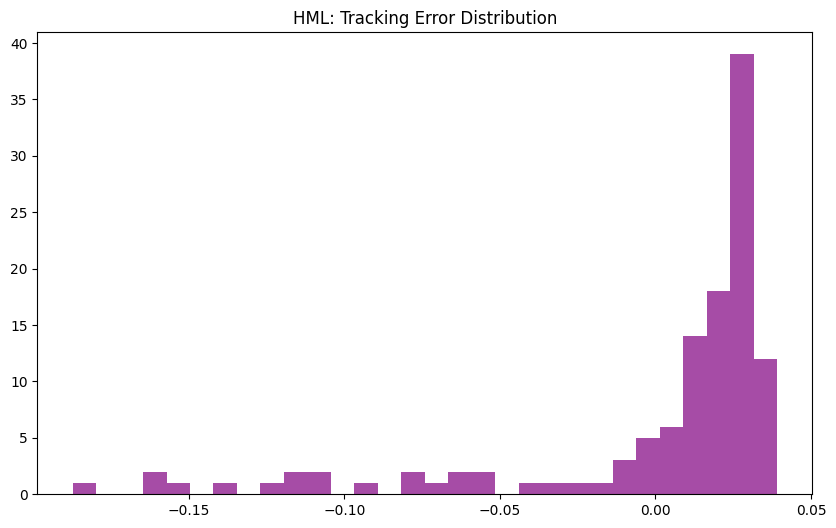

In [4]:
import matplotlib.pyplot as plt

def plot_results(stock_name):
    # Predicted vs Actual
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data[f'{stock_name}_excess'], label='Actual Returns', color='blue')
    plt.plot(stock_data.index, stock_data[f'predicted_excess_{stock_name}'], label='Predicted Returns', color='orange')
    plt.title(f'{stock_name}: Actual vs Predicted Excess Returns')
    plt.legend()
    plt.savefig(f'{stock_name}_actual_vs_predicted.png')
    plt.show()

    # Tracking Error
    plt.figure(figsize=(10, 6))
    plt.hist(stock_data[f'tracking_error_{stock_name}'], bins=30, color='purple', alpha=0.7)
    plt.title(f'{stock_name}: Tracking Error Distribution')
    plt.savefig(f'{stock_name}_tracking_error.png')
    plt.show()

# Generate plots for each stock
for stock in ['XOM', 'Mkt-RF', 'SMB', 'HML']:
    plot_results(stock)
